# Predicting Default

### LVC 3 - Introduction to Supervised Learning: Classification


## Problem and Context

- It is very critical to be able to identify the loan defaults in financial domain. Given a set of features about a person, the goal is to predict if the person will default or not.

- In this notebook we are going to cover the concepts of the LVC 3 and try to create a model that predicts if a particular data point will default or not.

## Data Information

The data used here has the below features:

- Default - Yes/No, categorical dependent variable suggesting the state of default
- Student - Yes/No, categorical independent variable depicting if the applicant is a student or not.
- balance - account balance of the applicant
- Income - Income of the applicant

### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore') # to get rid of warning messages

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format        

# Update default background style of plots
sns.set_style(style='darkgrid')

In [3]:
# Let us import the files
df = pd.read_csv('Default.csv')

In [4]:
df.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.53,"44,361.63"
1,2,No,Yes,817.18,"12,106.13"
2,3,No,No,"1,073.55","31,767.14"
3,4,No,No,529.25,"35,704.49"
4,5,No,No,785.66,"38,463.50"


In [5]:
#Dropping the column Unnamed:0 as it is just the index
df.drop(columns = ['Unnamed: 0'], inplace=True)
df.head()

,default,student,balance,income
0,No,No,729.53,"44,361.63"
1,No,Yes,817.18,"12,106.13"
2,No,No,"1,073.55","31,767.14"
3,No,No,529.25,"35,704.49"
4,No,No,785.66,"38,463.50"


In [6]:
# Let us define a dictionary to replace the Yes/No into numerical values

encoding_dict = {'Yes': 1, 'No': 0}

In [7]:
# encoding the features

df['default'] = df['default'].map(encoding_dict)
df['student'] = df['student'].map(encoding_dict)

In [8]:
df.head()

,default,student,balance,income
0,0,0,729.53,"44,361.63"
1,0,1,817.18,"12,106.13"
2,0,0,"1,073.55","31,767.14"
3,0,0,529.25,"35,704.49"
4,0,0,785.66,"38,463.50"


Let's check how many % persons have defaulted on the loan.

In [9]:
df.describe()
df['default'].value_counts(normalize = True)

0   0.97
1   0.03
Name: default, dtype: float64

In [10]:
# Only 3.33% of data points represent the class Default.
# Let us also have a look at the info of the same.

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  int64  
 1   student  10000 non-null  int64  
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 312.6 KB


- There do not seem to be any missing values. Let us just get straight to the modeling.

# Linear Discriminant Analysis

In [11]:
# use sklearn LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [12]:
# Using only one feature - balance

balance = df.balance.values.reshape(len(df['balance']), 1)
default = df.default.values.reshape(len(df['default']), 1)
student = df.student.values.reshape(len(df['student']), 1)
income = df.income.values.reshape(len(df['income']), 1)
features = ['balance', 'student', 'income']

# Fitting a LDA model

lda = LinearDiscriminantAnalysis()
lda.fit(balance, df['default'])
lda_error_rate = (1 - lda.score(balance, default))*100

# Fitting a QDA model

qda = QuadraticDiscriminantAnalysis()
qda.fit(balance, df['default'])
qda_error_rate = (1 - qda.score(balance, default))*100


print("LDA error rate while using only balance as a feature is {}% ".format(np.round(lda_error_rate,2)))
print("QDA error rate while using only balance as a feature is {}%".format(np.round(qda_error_rate,2)))

LDA error rate while using only balance as a feature is 2.81% 
QDA error rate while using only balance as a feature is 2.74%


In [13]:
# Let us now use all the features
lda.fit(df[features], df['default'])
qda.fit(df[features], df['default'])

new_lda_error_rate = (1 - lda.score(df[features], df['default']))*100
new_qda_error_rate = (1 - qda.score(df[features], df['default']))*100

print("LDA error rate using all the features is {}% ".format(np.round(new_lda_error_rate,2)))
print("QDA error rate using all the features is {}%".format(np.round(new_qda_error_rate,2)))

LDA error rate using all the features is 2.76% 
QDA error rate using all the features is 2.7%


**Observations:** We can see that by using all the features to predict default, the error rate has reduced.

## Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
lr = LogisticRegression(penalty='none', max_iter=100)
lr.fit(balance, df['default'])
lr_error_rate = (1 - lr.score(balance, df['default']))*100


print("Logistic Regression error rate using balance feature is {}% ".format(np.round(lr_error_rate,2)))

Logistic Regression error rate using balance feature is 2.75% 


In [16]:
lr.get_params

<bound method BaseEstimator.get_params of LogisticRegression(penalty='none')>

In [17]:
lrm = LogisticRegression(penalty='none')
lrm.fit(df[features], df['default'])
lr_error_rate = (1 - lrm.score(df[features], df['default']))*100

lrm_r = LogisticRegression(penalty='l1', solver = 'liblinear')
lrm_r.fit(df[features], df['default'])
lrm_r_error_rate = (1 - lrm_r.score(df[features], df['default']))*100

print("Logistic Regression error rate using all the features is {}% ".format(np.round(lr_error_rate,2)))
print("Logistic Regression error rate using absolute value (Lasso) regularization is {}% ".format(np.round(lrm_r_error_rate,2)))

Logistic Regression error rate using all the features is 3.28% 
Logistic Regression error rate using absolute value (Lasso) regularization is 2.66% 


**Observations-**
- We calculated the error rates for LDA, QDA and Logistic Regression
- The hyperparameter - 'multi_class' takes care of the multiclass classification.
- To evaluate the model and to check how well it performs on unseen data, always take a validation set out and check the performance of the model on the same.
- Let us now move to KNN, where we demonstrate the validation set performance check

## K-Nearest Neighbors (KNN)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# let us now scale the features

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

**NOTE**: The following code might take few minutes to run depending on the system's configuration

In [19]:
# We select the best value of k for which the error rate is the least in the validation data
# Let us loop over a few values of the k to determine the best k 

train_error = []
test_error = []
knn_many_split = {}

error_df_knn = pd.DataFrame()


for k in range(1,16):
  train_error = []
  test_error = []
  lista = []
  knn = KNeighborsClassifier(n_neighbors=k)
  print(k)
  for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(df[features], df['default'], test_size = 0.20)
    #let us scale the data. Notice the scaling done here.
    x_train = ss.fit_transform(x_train)
    x_test = ss.transform(x_test)
    knn.fit(x_train, y_train)
    train_error.append(1 - knn.score(x_train, y_train)) 
    test_error.append(1 - knn.score(x_test, y_test))
  lista.append(sum(train_error)/len(train_error))
  lista.append(sum(test_error)/len(test_error))
  knn_many_split[k] = lista
  print(knn_many_split[k])


knn_many_split

1
[0.0, 0.04285500000000002]
2
[0.021759999999999998, 0.033745000000000004]
3
[0.022382500000000003, 0.03299500000000002]
4
[0.024956249999999992, 0.030245]
5
[0.024806250000000002, 0.030845000000000008]
6
[0.025468750000000005, 0.029034999999999988]
7
[0.024880000000000003, 0.029120000000000007]
8
[0.025415, 0.02863999999999999]
9
[0.025419999999999995, 0.029339999999999984]
10
[0.02599875, 0.027944999999999998]
11
[0.02570750000000001, 0.028404999999999986]
12
[0.026216250000000007, 0.028444999999999995]
13
[0.026117500000000002, 0.027415]
14
[0.02645125000000001, 0.02814499999999999]
15
[0.02619125000000002, 0.02806999999999999]


{1: [0.0, 0.04285500000000002],
 2: [0.021759999999999998, 0.033745000000000004],
 3: [0.022382500000000003, 0.03299500000000002],
 4: [0.024956249999999992, 0.030245],
 5: [0.024806250000000002, 0.030845000000000008],
 6: [0.025468750000000005, 0.029034999999999988],
 7: [0.024880000000000003, 0.029120000000000007],
 8: [0.025415, 0.02863999999999999],
 9: [0.025419999999999995, 0.029339999999999984],
 10: [0.02599875, 0.027944999999999998],
 11: [0.02570750000000001, 0.028404999999999986],
 12: [0.026216250000000007, 0.028444999999999995],
 13: [0.026117500000000002, 0.027415],
 14: [0.02645125000000001, 0.02814499999999999],
 15: [0.02619125000000002, 0.02806999999999999]}

In [20]:
# Extracting k, the train and the test error in a list for easy plotting

kl = []
vl = []
v2 = []
for k, v in knn_many_split.items():
    kl.append(k)
    vl.append(knn_many_split[k][1])
    v2.append(knn_many_split[k][0])

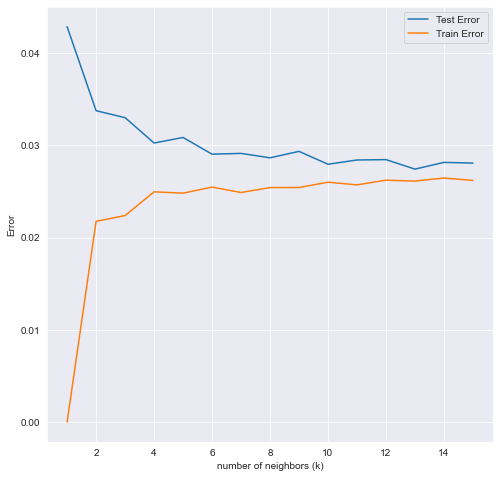

In [21]:
# Plotting k vs train and test error
plt.figure(figsize=(8,8))
plt.xlabel("number of neighbors (k)")
plt.ylabel("Error")
plt.plot(kl,vl, label = 'Test Error')
plt.plot(kl, v2, label = 'Train Error')
plt.legend()
plt.show()

**Observations**: From the above graph, we can say k=15 gives us the generalized train & test error.